In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import files
trainTitanicCSV = files.upload()

trainTitanic = pd.read_csv('train.csv')
trainTitanic.head()

Saving train.csv to train (5).csv


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [ ]:
from google.colab import files
testTitanicCSV = files.upload()

testTitanic = pd.read_csv('test.csv')
testTitanic.head()

Saving test.csv to test.csv


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [ ]:
trainTitanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


<Axes: xlabel='Transported', ylabel='Count'>

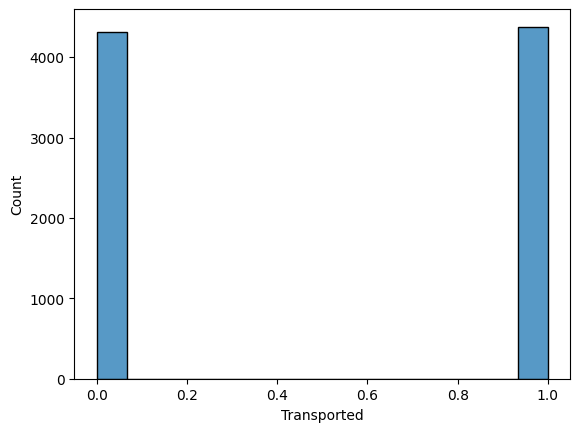

In [ ]:
sns.histplot(trainTitanic['Transported'])

In [ ]:
X = trainTitanic.drop('Transported', axis=1)
y = trainTitanic['Transported']

In [ ]:
# columns with high proportion NaN value
nan_percentage = X.isnull().sum() / len(X) * 100
cols_with_high_nan = nan_percentage[nan_percentage > 50].index.tolist()
print("Columns with more than 50% missing values:")
print(cols_with_high_nan)

Columns with more than 50% missing values:
[]


In [ ]:
testTitanic.drop(['Name'], axis=1, inplace=True)

In [ ]:
X.drop(['Name'], axis=1, inplace=True)

In [ ]:
# Ordinal: VIP, CryoSleep, Destination, HomePlanet
# divided column: Cabin

In [ ]:
testTitanic[['Deck', 'CabinNum', 'Side']] = testTitanic['Cabin'].str.split('/', expand=True)

In [ ]:
testTitanic[['NoId', 'HiddenId']] = testTitanic['PassengerId'].str.split('_', expand=True)

In [ ]:
testTitanic.drop(['PassengerId'], axis=1, inplace=True)
testTitanic.drop(['Cabin', 'NoId'], axis=1, inplace=True)

In [ ]:
X[['Deck', 'CabinNum', 'Side']] = X['Cabin'].str.split('/', expand=True)

In [ ]:
X[['NoId', 'HiddenId']] = X['PassengerId'].str.split('_', expand=True)

In [ ]:
X.drop(['PassengerId'], axis=1, inplace=True)

In [ ]:
X.drop(['Cabin', 'NoId'], axis=1, inplace=True)
X.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,CabinNum,Side,HiddenId
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,B,0,P,01
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,F,0,S,01
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,A,0,S,01
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,A,0,S,02
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,F,1,S,01


In [ ]:
categorical_cols = X.select_dtypes(include='object')
print("Categorical columns in X and their number of unique values:")
for col in categorical_cols.columns:
    print(f"- {col}: {categorical_cols[col].nunique()} unique values")

Categorical columns in X and their number of unique values:
- HomePlanet: 3 unique values
- CryoSleep: 2 unique values
- Destination: 3 unique values
- VIP: 2 unique values
- Deck: 8 unique values
- CabinNum: 1817 unique values
- Side: 2 unique values
- HiddenId: 8 unique values


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_cols = ['VIP', 'CryoSleep', 'Destination', 'HomePlanet', 'Deck', 'CabinNum', 'Side', 'HiddenId']
encoder = OrdinalEncoder()
X[ordinal_cols] = encoder.fit_transform(X[ordinal_cols])

In [ ]:
testTitanic[ordinal_cols] = encoder.fit_transform(testTitanic[ordinal_cols])

In [ ]:
X.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,CabinNum,Side,HiddenId
0,1.0,0.0,2.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,2.0,24.0,0.0,109.0,9.0,25.0,549.0,44.0,5.0,0.0,1.0,0.0
2,1.0,0.0,2.0,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,0.0,0.0,1.0,0.0
3,1.0,0.0,2.0,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,0.0,0.0,1.0,1.0
4,0.0,0.0,2.0,16.0,0.0,303.0,70.0,151.0,565.0,2.0,5.0,1.0,1.0,0.0


In [ ]:
missing_values_after_imputation = X.isnull().sum()
missing_values_after_imputation = missing_values_after_imputation[missing_values_after_imputation > 0].sort_values(ascending=False)

print("Columns in X with remaining missing values and their unique value count:")
for col in missing_values_after_imputation.index:
    print(f"- {col}: {missing_values_after_imputation[col]} missing values, {X[col].nunique()} unique values")

Columns in X with remaining missing values and their unique value count:


In [ ]:
# IMPUTE WITH MEAN
def impute_column_by_correlation_mean(df, target_col):
    numeric_df = df.select_dtypes(include=[np.number])

    correlated_cols = (
        numeric_df.corr()[target_col]
        .drop(target_col)
        .abs()
        .sort_values(ascending=False)
        .index
        .tolist()
    )

    for col in correlated_cols:
        temp = df[target_col].copy()
        group_means = df.groupby(col)[target_col].transform('mean')
        temp.fillna(group_means, inplace=True)
        if temp.isna().sum() == 0:
            df[target_col] = temp
            return df
        else:
            df[target_col] = temp

    return df

In [ ]:
# IMPUTE WITH MODE

def impute_column_by_correlation_mode(df, target_col):
    numeric_df = df.select_dtypes(include=[np.number])

    correlated_cols = (
        numeric_df.corr()[target_col]
        .drop(target_col)
        .abs()
        .sort_values(ascending=False)
        .index
        .tolist()
    )

    for col in correlated_cols:
        temp = df[target_col].copy()

        group_modes = df.groupby(col)[target_col].transform(
            lambda x: x.mode()[0] if not x.mode().empty else np.nan
        )

        temp.fillna(group_modes, inplace=True)

        if temp.isna().sum() == 0:
            df[target_col] = temp
            return df
        else:
            df[target_col] = temp

    return df

In [ ]:
X = impute_column_by_correlation_mode(X, 'CryoSleep')

In [ ]:
testTitanic = impute_column_by_correlation_mode(testTitanic, 'CryoSleep')

In [ ]:
X['CryoSleep'].isna().sum()

np.int64(0)

In [ ]:
X = impute_column_by_correlation_mean(X, 'ShoppingMall')
X['ShoppingMall'].isna().sum()

np.int64(0)

In [ ]:
testTitanic = impute_column_by_correlation_mean(testTitanic, 'ShoppingMall')
testTitanic['ShoppingMall'].isna().sum()

np.int64(0)

In [ ]:
X = impute_column_by_correlation_mode(X, 'VIP')
X['VIP'].isna().sum()

np.int64(0)

In [ ]:
testTitanic = impute_column_by_correlation_mode(testTitanic, 'VIP')
testTitanic['VIP'].isna().sum()

np.int64(0)

In [ ]:
X = impute_column_by_correlation_mode(X, 'HomePlanet')
X['HomePlanet'].isna().sum()

np.int64(0)

In [ ]:
testTitanic = impute_column_by_correlation_mode(testTitanic, 'HomePlanet')
testTitanic['HomePlanet'].isna().sum()

np.int64(0)

In [ ]:
X = impute_column_by_correlation_mode(X, 'Side')
X['Side'].isna().sum()

np.int64(0)

In [ ]:
testTitanic = impute_column_by_correlation_mode(testTitanic, 'Side')
testTitanic['Side'].isna().sum()

np.int64(0)

In [ ]:
X = impute_column_by_correlation_mean(X, 'CabinNum')
X['CabinNum'].isna().sum()

np.int64(0)

In [ ]:
testTitanic = impute_column_by_correlation_mean(testTitanic, 'CabinNum')
testTitanic['CabinNum'].isna().sum()

np.int64(0)

In [ ]:
X = impute_column_by_correlation_mode(X, 'Deck')
X['Deck'].isna().sum()

np.int64(0)

In [ ]:
testTitanic = impute_column_by_correlation_mode(testTitanic, 'Deck')
testTitanic['Deck'].isna().sum()

np.int64(0)

In [ ]:
X = impute_column_by_correlation_mean(X, 'VRDeck')
X['VRDeck'].isna().sum()

np.int64(0)

In [ ]:
testTitanic = impute_column_by_correlation_mean(testTitanic, 'VRDeck')
testTitanic['VRDeck'].isna().sum()

np.int64(0)

In [ ]:
X = impute_column_by_correlation_mean(X, 'FoodCourt')
X['FoodCourt'].isna().sum()

np.int64(0)

In [ ]:
testTitanic = impute_column_by_correlation_mean(testTitanic, 'FoodCourt')
testTitanic['FoodCourt'].isna().sum()

np.int64(0)

In [ ]:
X = impute_column_by_correlation_mean(X, 'Spa')
X['Spa'].isna().sum()

np.int64(0)

In [ ]:
testTitanic = impute_column_by_correlation_mean(testTitanic, 'Spa')
testTitanic['Spa'].isna().sum()

np.int64(0)

In [ ]:
X = impute_column_by_correlation_mode(X, 'Destination')
X['Destination'].isna().sum()

np.int64(0)

In [ ]:
testTitanic = impute_column_by_correlation_mode(testTitanic, 'Destination')
testTitanic['Destination'].isna().sum()

np.int64(0)

In [ ]:
X = impute_column_by_correlation_mean(X, 'RoomService')
X['RoomService'].isna().sum()

np.int64(0)

In [ ]:
testTitanic = impute_column_by_correlation_mean(testTitanic, 'RoomService')
testTitanic['RoomService'].isna().sum()

np.int64(0)

In [ ]:
X = impute_column_by_correlation_mean(X, 'Age')
X['Age'].isna().sum()

np.int64(0)

In [ ]:
testTitanic = impute_column_by_correlation_mean(testTitanic, 'Age')
testTitanic['Age'].isna().sum()

np.int64(0)

<Axes: >

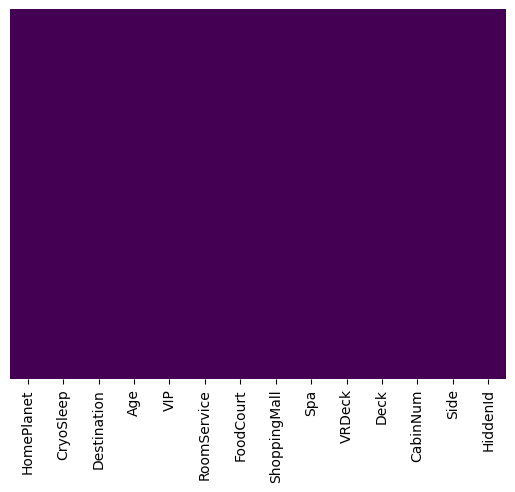

In [ ]:
sns.heatmap(testTitanic.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<Axes: >

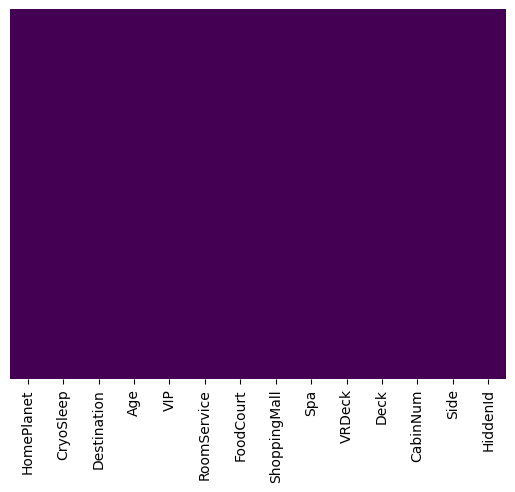

In [ ]:
sns.heatmap(X.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
print("Number of missing values in each column of X:")
print(testTitanic.isnull().sum())

Number of missing values in each column of X:
HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Deck            0
CabinNum        0
Side            0
HiddenId        0
dtype: int64


In [ ]:
print("Number of missing values in each column of X:")
print(X.isnull().sum())

Number of missing values in each column of X:
HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Deck            0
CabinNum        0
Side            0
HiddenId        0
dtype: int64


In [ ]:
# Feature Engineering
X['Total_Bill'] = X[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)

In [ ]:
# Feature Engineering
testTitanic['Total_Bill'] = X[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

print("First 5 rows of the scaled DataFrame X:")
display(X_scaled.head())

First 5 rows of the scaled DataFrame X:


,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,CabinNum,Side,HiddenId,Total_Bill
0,0.5,0.0,1.0,0.493671,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.0,0.000000,0.000000
1,0.0,0.0,1.0,0.303797,0.0,0.007608,0.000302,0.001064,0.024500,0.001823,0.714286,0.000000,1.0,0.000000,0.020452
2,0.5,0.0,1.0,0.734177,1.0,0.003001,0.119948,0.000000,0.299670,0.002030,0.000000,0.000000,1.0,0.000000,0.288521
3,0.5,0.0,1.0,0.417722,0.0,0.000000,0.043035,0.015793,0.148563,0.007997,0.000000,0.000000,1.0,0.142857,0.143830
4,0.0,0.0,1.0,0.202532,0.0,0.021149,0.002348,0.006428,0.025214,0.000083,0.714286,0.000551,1.0,0.000000,0.030317


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['HomePlanet'].plot(kind='hist', bins=20, title='HomePlanet')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['VIP'].plot(kind='hist', bins=20, title='VIP')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='index', y='HomePlanet', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='HomePlanet', y='Age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Age', y='VIP', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='VIP', y='RoomService', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['HomePlanet']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('HomePlanet')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Age')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['VIP']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('VIP')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['RoomService']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('RoomService')

from matplotlib import pyplot as plt
_df_12['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['HomePlanet'].plot(kind='line', figsize=(8, 4), title='HomePlanet')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['Age'].plot(kind='line', figsize=(8, 4), title='Age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['VIP'].plot(kind='line', figsize=(8, 4), title='VIP')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
testTitanic_scaled = scaler.transform(testTitanic)

testTitanic_scaled = pd.DataFrame(testTitanic_scaled, columns=testTitanic.columns)

print("First 5 rows of the scaled DataFrame X:")
display(X_scaled.head())

First 5 rows of the scaled DataFrame X:


,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,CabinNum,Side,HiddenId,Total_Bill
0,0.5,0.0,1.0,0.493671,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.0,0.000000,0.000000
1,0.0,0.0,1.0,0.303797,0.0,0.007608,0.000302,0.001064,0.024500,0.001823,0.714286,0.000000,1.0,0.000000,0.020452
2,0.5,0.0,1.0,0.734177,1.0,0.003001,0.119948,0.000000,0.299670,0.002030,0.000000,0.000000,1.0,0.000000,0.288521
3,0.5,0.0,1.0,0.417722,0.0,0.000000,0.043035,0.015793,0.148563,0.007997,0.000000,0.000000,1.0,0.142857,0.143830
4,0.0,0.0,1.0,0.202532,0.0,0.021149,0.002348,0.006428,0.025214,0.000083,0.714286,0.000551,1.0,0.000000,0.030317


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=101)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

svm_model = SVC()
svm_model.fit(X_train, y_train)
predictions_SVM = svm_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions_SVM))

print("\nClassification Report:")
print(classification_report(y_test, predictions_SVM))

Confusion Matrix:
[[1093  206]
 [ 400  909]]

Classification Report:
              precision    recall  f1-score   support

       False       0.73      0.84      0.78      1299
        True       0.82      0.69      0.75      1309

    accuracy                           0.77      2608
   macro avg       0.77      0.77      0.77      2608
weighted avg       0.77      0.77      0.77      2608



In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)
predictions_xgb = xgb_model.predict(X_test)

print("Confusion Matrix for XGBoost:")
print(confusion_matrix(y_test, predictions_xgb))

print("\nClassification Report for XGBoost:")
print(classification_report(y_test, predictions_xgb))

Confusion Matrix for XGBoost:
[[1053  246]
 [ 257 1052]]

Classification Report for XGBoost:
              precision    recall  f1-score   support

       False       0.80      0.81      0.81      1299
        True       0.81      0.80      0.81      1309

    accuracy                           0.81      2608
   macro avg       0.81      0.81      0.81      2608
weighted avg       0.81      0.81      0.81      2608



In [ ]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

param_grid_xgb = {
    'n_estimators': [100, 200, 500, 1000],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

grid_xgb = GridSearchCV(xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'), param_grid_xgb, refit=True, verbose=3)
grid_xgb.fit(X_train, y_train)

print("Best parameters found by Grid Search for XGBoost:")
print(grid_xgb.best_params_)
print("\nBest cross-validation score for XGBoost:")
print(grid_xgb.best_score_)

grid_xgb_predictions = grid_xgb.predict(X_test)

print("\nConfusion Matrix for the best XGBoost model:")
print(confusion_matrix(y_test, grid_xgb_predictions))
print("\nClassification Report for the best XGBoost model:")
print(classification_report(y_test, grid_xgb_predictions))

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV 1/5] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.777 total time=   0.1s
[CV 2/5] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.786 total time=   0.1s
[CV 3/5] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.743 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:20:10] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:20:10] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:20:10] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:20:10] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 4/5] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.765 total time=   0.1s
[CV 5/5] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.763 total time=   0.1s
[CV 1/5] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=200;, score=0.784 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:20:10] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:20:10] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:20:10] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/5] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=200;, score=0.796 total time=   0.1s
[CV 3/5] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=200;, score=0.758 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:20:11] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:20:11] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 4/5] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=200;, score=0.773 total time=   0.1s
[CV 5/5] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=200;, score=0.770 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:20:11] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:20:11] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/5] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=500;, score=0.795 total time=   0.2s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:20:11] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/5] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=500;, score=0.807 total time=   0.2s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:20:11] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 3/5] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=500;, score=0.772 total time=   0.2s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:20:12] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 4/5] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=500;, score=0.792 total time=   0.2s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:20:12] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 5/5] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=500;, score=0.786 total time=   0.2s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:20:12] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/5] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=1000;, score=0.801 total time=   0.4s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:20:12] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/5] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=1000;, score=0.817 total time=   0.4s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:20:13] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 3/5] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=1000;, score=0.776 total time=   0.4s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:20:13] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 4/5] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=1000;, score=0.791 total time=   0.4s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:20:14] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 5/5] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=1000;, score=0.796 total time=   0.4s
[CV 1/5] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=100;, score=0.792 total time=   0.1s
[CV 2/5] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=100;, score=0.808 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:20:14] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:20:14] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:20:14] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 3/5] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=100;, score=0.768 total time=   0.1s
[CV 4/5] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=100;, score=0.789 total time=   0.1s
[CV 5/5] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=100;, score=0.782 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:20:14] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:20:14] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:20:15] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/5] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=200;, score=0.801 total time=   0.2s
[CV 2/5] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=200;, score=0.813 total time=   0.2s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:20:15] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:20:15] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 3/5] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=200;, score=0.767 total time=   0.2s
[CV 4/5] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=200;, score=0.801 total time=   0.2s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:20:15] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:20:15] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 5/5] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=200;, score=0.789 total time=   0.2s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:20:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/5] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=500;, score=0.808 total time=   0.4s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:20:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/5] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=500;, score=0.822 total time=   0.4s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:20:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 3/5] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=500;, score=0.776 total time=   0.4s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:20:17] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 4/5] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=500;, score=0.798 total time=   0.5s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:20:17] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 5/5] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=500;, score=0.795 total time=   0.4s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:20:18] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/5] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=1000;, score=0.817 total time=   0.7s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:20:18] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/5] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=1000;, score=0.817 total time=   0.8s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:20:19] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 3/5] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=1000;, score=0.773 total time=   1.0s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:20:20] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 4/5] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=1000;, score=0.798 total time=   1.7s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:20:22] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 5/5] END colsample_bytree=0.7, learning_rate=0.01, max_depth=5, n_estimators=1000;, score=0.799 total time=   0.8s
[CV 1/5] END colsample_bytree=0.7, learning_rate=0.01, max_depth=7, n_estimators=100;, score=0.799 total time=   0.2s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:20:23] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:20:23] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/5] END colsample_bytree=0.7, learning_rate=0.01, max_depth=7, n_estimators=100;, score=0.812 total time=   0.2s
[CV 3/5] END colsample_bytree=0.7, learning_rate=0.01, max_depth=7, n_estimators=100;, score=0.767 total time=   0.2s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:20:23] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:20:23] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 4/5] END colsample_bytree=0.7, learning_rate=0.01, max_depth=7, n_estimators=100;, score=0.799 total time=   0.2s
[CV 5/5] END colsample_bytree=0.7, learning_rate=0.01, max_depth=7, n_estimators=100;, score=0.794 total time=   0.2s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:20:23] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:20:24] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/5] END colsample_bytree=0.7, learning_rate=0.01, max_depth=7, n_estimators=200;, score=0.800 total time=   0.4s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:20:24] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/5] END colsample_bytree=0.7, learning_rate=0.01, max_depth=7, n_estimators=200;, score=0.808 total time=   0.3s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:20:24] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 3/5] END colsample_bytree=0.7, learning_rate=0.01, max_depth=7, n_estimators=200;, score=0.770 total time=   0.4s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:20:25] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 4/5] END colsample_bytree=0.7, learning_rate=0.01, max_depth=7, n_estimators=200;, score=0.800 total time=   0.3s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:20:25] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 5/5] END colsample_bytree=0.7, learning_rate=0.01, max_depth=7, n_estimators=200;, score=0.801 total time=   0.3s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:20:25] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/5] END colsample_bytree=0.7, learning_rate=0.01, max_depth=7, n_estimators=500;, score=0.809 total time=   0.8s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:20:26] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/5] END colsample_bytree=0.7, learning_rate=0.01, max_depth=7, n_estimators=500;, score=0.816 total time=   0.8s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:20:27] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 3/5] END colsample_bytree=0.7, learning_rate=0.01, max_depth=7, n_estimators=500;, score=0.770 total time=   0.7s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:20:28] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 4/5] END colsample_bytree=0.7, learning_rate=0.01, max_depth=7, n_estimators=500;, score=0.803 total time=   0.7s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:20:28] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 5/5] END colsample_bytree=0.7, learning_rate=0.01, max_depth=7, n_estimators=500;, score=0.803 total time=   0.8s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:20:29] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/5] END colsample_bytree=0.7, learning_rate=0.01, max_depth=7, n_estimators=1000;, score=0.815 total time=   1.3s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:20:30] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/5] END colsample_bytree=0.7, learning_rate=0.01, max_depth=7, n_estimators=1000;, score=0.811 total time=   2.6s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:20:33] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 3/5] END colsample_bytree=0.7, learning_rate=0.01, max_depth=7, n_estimators=1000;, score=0.767 total time=   1.2s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:20:34] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 4/5] END colsample_bytree=0.7, learning_rate=0.01, max_depth=7, n_estimators=1000;, score=0.798 total time=   1.2s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:20:35] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 5/5] END colsample_bytree=0.7, learning_rate=0.01, max_depth=7, n_estimators=1000;, score=0.800 total time=   1.2s
[CV 1/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=100;, score=0.799 total time=   0.1s
[CV 2/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=100;, score=0.815 total time=   0.1s
[CV 3/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=100;, score=0.772 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:20:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:20:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:20:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:20:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 4/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=100;, score=0.794 total time=   0.1s
[CV 5/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=100;, score=0.796 total time=   0.1s
[CV 1/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=200;, score=0.813 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:20:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:20:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:20:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=200;, score=0.813 total time=   0.1s
[CV 3/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=200;, score=0.773 total time=   0.1s
[CV 4/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=200;, score=0.793 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:20:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:20:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:20:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 5/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=200;, score=0.793 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:20:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=500;, score=0.815 total time=   0.2s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:20:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=500;, score=0.815 total time=   0.2s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:20:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 3/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=500;, score=0.772 total time=   0.2s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:20:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 4/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=500;, score=0.790 total time=   0.2s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:20:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 5/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=500;, score=0.804 total time=   0.2s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:20:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=1000;, score=0.811 total time=   0.5s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:20:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=1000;, score=0.797 total time=   0.4s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:20:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 3/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=1000;, score=0.768 total time=   0.4s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:20:40] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 4/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=1000;, score=0.795 total time=   0.4s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:20:40] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 5/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=3, n_estimators=1000;, score=0.806 total time=   0.4s
[CV 1/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=5, n_estimators=100;, score=0.809 total time=   0.1s
[CV 2/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=5, n_estimators=100;, score=0.821 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:20:41] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:20:41] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:20:41] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 3/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=5, n_estimators=100;, score=0.767 total time=   0.1s
[CV 4/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=5, n_estimators=100;, score=0.804 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:20:41] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:20:41] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 5/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=5, n_estimators=100;, score=0.802 total time=   0.1s
[CV 1/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=5, n_estimators=200;, score=0.814 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:20:41] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:20:41] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=5, n_estimators=200;, score=0.813 total time=   0.2s
[CV 3/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=5, n_estimators=200;, score=0.767 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:20:41] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:20:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 4/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=5, n_estimators=200;, score=0.792 total time=   0.2s
[CV 5/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=5, n_estimators=200;, score=0.795 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:20:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:20:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=5, n_estimators=500;, score=0.804 total time=   0.4s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:20:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=5, n_estimators=500;, score=0.804 total time=   0.3s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:20:43] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 3/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=5, n_estimators=500;, score=0.771 total time=   1.2s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:20:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 4/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=5, n_estimators=500;, score=0.790 total time=   0.7s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:20:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 5/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=5, n_estimators=500;, score=0.796 total time=   0.3s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:20:45] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=5, n_estimators=1000;, score=0.798 total time=   0.7s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:20:45] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=5, n_estimators=1000;, score=0.790 total time=   0.7s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:20:46] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 3/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=5, n_estimators=1000;, score=0.769 total time=   0.7s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:20:47] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 4/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=5, n_estimators=1000;, score=0.785 total time=   0.7s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:20:47] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 5/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=5, n_estimators=1000;, score=0.802 total time=   0.6s
[CV 1/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=7, n_estimators=100;, score=0.812 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:20:48] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:20:48] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=7, n_estimators=100;, score=0.811 total time=   0.2s
[CV 3/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=7, n_estimators=100;, score=0.772 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:20:48] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:20:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 4/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=7, n_estimators=100;, score=0.795 total time=   0.2s
[CV 5/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=7, n_estimators=100;, score=0.804 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:20:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:20:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=7, n_estimators=200;, score=0.809 total time=   0.2s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:20:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=7, n_estimators=200;, score=0.805 total time=   0.3s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:20:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 3/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=7, n_estimators=200;, score=0.774 total time=   0.2s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:20:50] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 4/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=7, n_estimators=200;, score=0.803 total time=   0.2s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:20:50] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 5/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=7, n_estimators=200;, score=0.808 total time=   0.2s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:20:50] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=7, n_estimators=500;, score=0.789 total time=   0.5s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:20:51] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=7, n_estimators=500;, score=0.797 total time=   0.5s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:20:51] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 3/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=7, n_estimators=500;, score=0.770 total time=   0.6s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:20:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 4/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=7, n_estimators=500;, score=0.787 total time=   0.5s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:20:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 5/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=7, n_estimators=500;, score=0.799 total time=   0.5s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:20:53] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=7, n_estimators=1000;, score=0.783 total time=   1.0s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:20:54] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=7, n_estimators=1000;, score=0.789 total time=   2.1s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:20:56] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 3/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=7, n_estimators=1000;, score=0.763 total time=   1.0s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:20:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 4/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=7, n_estimators=1000;, score=0.791 total time=   1.0s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:20:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 5/5] END colsample_bytree=0.7, learning_rate=0.1, max_depth=7, n_estimators=1000;, score=0.800 total time=   1.0s
[CV 1/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=3, n_estimators=100;, score=0.813 total time=   0.1s
[CV 2/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=3, n_estimators=100;, score=0.818 total time=   0.1s
[CV 3/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=3, n_estimators=100;, score=0.775 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:20:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:20:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:20:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:20:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 4/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=3, n_estimators=100;, score=0.794 total time=   0.1s
[CV 5/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=3, n_estimators=100;, score=0.791 total time=   0.1s
[CV 1/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=3, n_estimators=200;, score=0.815 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:20:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:20:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:20:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=3, n_estimators=200;, score=0.817 total time=   0.1s
[CV 3/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=3, n_estimators=200;, score=0.772 total time=   0.1s
[CV 4/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=3, n_estimators=200;, score=0.793 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:20:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:20:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:20:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 5/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=3, n_estimators=200;, score=0.795 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=3, n_estimators=500;, score=0.810 total time=   0.3s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=3, n_estimators=500;, score=0.808 total time=   0.2s
[CV 3/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=3, n_estimators=500;, score=0.771 total time=   0.2s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 4/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=3, n_estimators=500;, score=0.790 total time=   0.2s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 5/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=3, n_estimators=500;, score=0.806 total time=   0.2s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=3, n_estimators=1000;, score=0.799 total time=   0.5s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=3, n_estimators=1000;, score=0.789 total time=   0.4s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 3/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=3, n_estimators=1000;, score=0.772 total time=   0.4s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 4/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=3, n_estimators=1000;, score=0.790 total time=   0.4s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 5/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=3, n_estimators=1000;, score=0.795 total time=   0.5s
[CV 1/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=5, n_estimators=100;, score=0.815 total time=   0.1s
[CV 2/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=5, n_estimators=100;, score=0.806 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:03] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:03] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:03] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 3/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=5, n_estimators=100;, score=0.765 total time=   0.6s
[CV 4/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=5, n_estimators=100;, score=0.800 total time=   0.1s
[CV 5/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=5, n_estimators=100;, score=0.790 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:04] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:04] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:04] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=5, n_estimators=200;, score=0.809 total time=   0.2s
[CV 2/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=5, n_estimators=200;, score=0.804 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:04] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:04] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 3/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=5, n_estimators=200;, score=0.772 total time=   0.2s
[CV 4/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=5, n_estimators=200;, score=0.791 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:04] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:04] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 5/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=5, n_estimators=200;, score=0.797 total time=   0.2s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:05] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=5, n_estimators=500;, score=0.804 total time=   0.4s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:05] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=5, n_estimators=500;, score=0.789 total time=   0.3s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:05] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 3/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=5, n_estimators=500;, score=0.772 total time=   0.4s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:06] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 4/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=5, n_estimators=500;, score=0.796 total time=   1.4s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:07] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 5/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=5, n_estimators=500;, score=0.794 total time=   0.3s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=5, n_estimators=1000;, score=0.781 total time=   0.7s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=5, n_estimators=1000;, score=0.789 total time=   0.6s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:09] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 3/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=5, n_estimators=1000;, score=0.762 total time=   0.7s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:10] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 4/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=5, n_estimators=1000;, score=0.782 total time=   0.7s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:10] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 5/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=5, n_estimators=1000;, score=0.796 total time=   0.6s
[CV 1/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=7, n_estimators=100;, score=0.803 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:11] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:11] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=7, n_estimators=100;, score=0.791 total time=   0.1s
[CV 3/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=7, n_estimators=100;, score=0.772 total time=   0.2s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:11] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:11] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 4/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=7, n_estimators=100;, score=0.784 total time=   0.1s
[CV 5/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=7, n_estimators=100;, score=0.802 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:11] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:12] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=7, n_estimators=200;, score=0.793 total time=   0.2s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:12] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=7, n_estimators=200;, score=0.793 total time=   0.2s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:12] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 3/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=7, n_estimators=200;, score=0.757 total time=   0.2s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:12] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 4/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=7, n_estimators=200;, score=0.786 total time=   0.2s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:12] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 5/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=7, n_estimators=200;, score=0.799 total time=   0.2s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:13] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=7, n_estimators=500;, score=0.784 total time=   0.5s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:13] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=7, n_estimators=500;, score=0.785 total time=   0.5s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:14] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 3/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=7, n_estimators=500;, score=0.760 total time=   0.5s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:14] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 4/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=7, n_estimators=500;, score=0.783 total time=   0.5s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:15] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 5/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=7, n_estimators=500;, score=0.803 total time=   0.5s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:15] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=7, n_estimators=1000;, score=0.781 total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=7, n_estimators=1000;, score=0.780 total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:17] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 3/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=7, n_estimators=1000;, score=0.755 total time=   2.1s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:19] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 4/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=7, n_estimators=1000;, score=0.788 total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:20] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 5/5] END colsample_bytree=0.7, learning_rate=0.2, max_depth=7, n_estimators=1000;, score=0.795 total time=   0.9s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.776 total time=   0.1s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.786 total time=   0.1s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.743 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:21] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:21] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:21] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:21] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 4/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.758 total time=   0.1s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.762 total time=   0.1s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=200;, score=0.790 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:21] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:21] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:21] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=200;, score=0.797 total time=   0.1s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=200;, score=0.753 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:21] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:22] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 4/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=200;, score=0.770 total time=   0.1s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=200;, score=0.771 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:22] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:22] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=500;, score=0.793 total time=   0.2s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:22] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=500;, score=0.809 total time=   0.2s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:22] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 3/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=500;, score=0.769 total time=   0.2s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:23] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 4/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=500;, score=0.789 total time=   0.3s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:23] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 5/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=500;, score=0.786 total time=   0.2s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:23] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=1000;, score=0.804 total time=   0.4s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:24] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=1000;, score=0.815 total time=   0.5s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:24] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 3/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=1000;, score=0.776 total time=   0.4s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:24] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 4/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=1000;, score=0.792 total time=   0.5s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:25] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 5/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=1000;, score=0.792 total time=   0.4s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=100;, score=0.786 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:25] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:25] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=100;, score=0.806 total time=   0.1s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=100;, score=0.771 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:26] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:26] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 4/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=100;, score=0.801 total time=   0.1s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=100;, score=0.780 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:26] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:26] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=200;, score=0.800 total time=   0.2s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=200;, score=0.808 total time=   0.2s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:26] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:26] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 3/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=200;, score=0.773 total time=   0.2s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=200;, score=0.804 total time=   0.2s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:27] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:27] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 5/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=200;, score=0.788 total time=   0.2s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:27] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=500;, score=0.809 total time=   0.4s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:27] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=500;, score=0.816 total time=   0.5s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:28] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 3/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=500;, score=0.776 total time=   0.5s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:28] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 4/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=500;, score=0.805 total time=   1.3s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:30] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 5/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=500;, score=0.795 total time=   0.8s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:30] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=1000;, score=0.813 total time=   0.8s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:31] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=1000;, score=0.815 total time=   0.8s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:32] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 3/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=1000;, score=0.774 total time=   0.8s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:33] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 4/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=1000;, score=0.811 total time=   0.8s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:34] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 5/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=1000;, score=0.797 total time=   0.8s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:35] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=100;, score=0.796 total time=   0.2s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=100;, score=0.804 total time=   0.2s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:35] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:35] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 3/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=100;, score=0.777 total time=   0.2s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=100;, score=0.804 total time=   0.2s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:35] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:35] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 5/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=100;, score=0.797 total time=   0.2s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:36] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=200;, score=0.805 total time=   0.4s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:36] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=200;, score=0.811 total time=   0.4s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:36] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 3/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=200;, score=0.771 total time=   0.4s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 4/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=200;, score=0.804 total time=   0.4s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 5/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=200;, score=0.800 total time=   0.4s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=500;, score=0.810 total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=500;, score=0.818 total time=   0.8s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 3/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=500;, score=0.775 total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:40] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 4/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=500;, score=0.808 total time=   2.0s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 5/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=500;, score=0.800 total time=   0.8s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:43] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=1000;, score=0.813 total time=   1.4s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=1000;, score=0.809 total time=   1.4s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:46] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 3/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=1000;, score=0.770 total time=   1.4s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:47] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 4/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=1000;, score=0.798 total time=   1.4s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 5/5] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=1000;, score=0.797 total time=   1.4s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=100;, score=0.806 total time=   0.1s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=100;, score=0.814 total time=   0.1s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=100;, score=0.776 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:50] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:50] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:50] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:50] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 4/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=100;, score=0.794 total time=   0.1s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=100;, score=0.791 total time=   0.1s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=200;, score=0.818 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:50] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:50] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:50] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=200;, score=0.820 total time=   0.1s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=200;, score=0.778 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:51] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:51] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 4/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=200;, score=0.795 total time=   0.1s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=200;, score=0.793 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:51] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:51] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=500;, score=0.827 total time=   0.2s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:51] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=500;, score=0.817 total time=   0.2s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:51] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 3/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=500;, score=0.777 total time=   0.2s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 4/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=500;, score=0.789 total time=   1.3s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:53] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 5/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=500;, score=0.800 total time=   0.3s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:53] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=1000;, score=0.813 total time=   0.4s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:54] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=1000;, score=0.808 total time=   0.4s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:54] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 3/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=1000;, score=0.777 total time=   0.4s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:54] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 4/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=1000;, score=0.790 total time=   0.4s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:55] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 5/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=1000;, score=0.800 total time=   0.4s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=100;, score=0.811 total time=   0.1s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=100;, score=0.813 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:55] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:55] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:56] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 3/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=100;, score=0.777 total time=   0.1s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=100;, score=0.804 total time=   0.1s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=100;, score=0.800 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:56] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:56] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:56] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=200;, score=0.808 total time=   0.2s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=200;, score=0.812 total time=   0.2s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:56] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:56] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 3/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=200;, score=0.769 total time=   0.2s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=200;, score=0.799 total time=   0.2s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:56] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 5/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=200;, score=0.798 total time=   0.2s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=500;, score=0.803 total time=   0.4s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=500;, score=0.801 total time=   0.4s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 3/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=500;, score=0.777 total time=   0.4s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 4/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=500;, score=0.795 total time=   0.4s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 5/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=500;, score=0.801 total time=   0.4s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=1000;, score=0.790 total time=   0.7s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:21:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=1000;, score=0.788 total time=   0.7s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:22:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 3/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=1000;, score=0.772 total time=   0.7s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:22:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 4/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=1000;, score=0.793 total time=   0.7s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:22:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 5/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=1000;, score=0.803 total time=   0.7s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=100;, score=0.811 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:22:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:22:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=100;, score=0.806 total time=   0.2s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=100;, score=0.767 total time=   0.2s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:22:03] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:22:03] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:22:03] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 4/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=100;, score=0.805 total time=   0.2s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=100;, score=0.803 total time=   0.4s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:22:03] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=200;, score=0.811 total time=   1.2s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:22:05] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=200;, score=0.797 total time=   0.3s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:22:05] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 3/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=200;, score=0.770 total time=   0.3s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:22:05] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 4/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=200;, score=0.795 total time=   0.3s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:22:05] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 5/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=200;, score=0.804 total time=   0.3s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:22:06] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=500;, score=0.791 total time=   0.6s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:22:06] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=500;, score=0.784 total time=   0.6s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:22:07] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 3/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=500;, score=0.764 total time=   0.6s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:22:07] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 4/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=500;, score=0.797 total time=   0.5s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:22:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 5/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=500;, score=0.804 total time=   0.6s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:22:09] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=1000;, score=0.783 total time=   1.1s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:22:10] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=1000;, score=0.783 total time=   1.1s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:22:11] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 3/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=1000;, score=0.761 total time=   1.1s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:22:12] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 4/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=1000;, score=0.795 total time=   1.1s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:22:13] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 5/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=1000;, score=0.796 total time=   1.1s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=100;, score=0.808 total time=   0.1s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=100;, score=0.823 total time=   0.1s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=100;, score=0.772 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:22:14] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:22:14] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:22:14] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:22:14] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 4/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=100;, score=0.790 total time=   0.1s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=100;, score=0.789 total time=   0.1s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=200;, score=0.811 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:22:14] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:22:14] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:22:14] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=200;, score=0.819 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:22:14] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 3/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=200;, score=0.775 total time=   0.3s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:22:15] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 4/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=200;, score=0.795 total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:22:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 5/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=200;, score=0.800 total time=   0.3s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:22:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=500;, score=0.811 total time=   0.2s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:22:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=500;, score=0.807 total time=   0.2s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:22:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 3/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=500;, score=0.781 total time=   0.2s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:22:17] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 4/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=500;, score=0.788 total time=   0.3s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:22:17] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 5/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=500;, score=0.804 total time=   0.3s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:22:17] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=1000;, score=0.801 total time=   0.4s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:22:18] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=1000;, score=0.792 total time=   0.5s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:22:18] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 3/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=1000;, score=0.769 total time=   0.4s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:22:18] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 4/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=1000;, score=0.792 total time=   0.5s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:22:19] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 5/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=1000;, score=0.798 total time=   0.4s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=100;, score=0.810 total time=   0.1s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=100;, score=0.799 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:22:19] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:22:19] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:22:20] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 3/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=100;, score=0.763 total time=   0.1s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=100;, score=0.789 total time=   0.1s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=100;, score=0.800 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:22:20] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:22:20] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:22:20] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:22:20] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=200;, score=0.807 total time=   0.2s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=200;, score=0.795 total time=   0.2s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:22:20] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:22:20] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 3/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=200;, score=0.772 total time=   0.2s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=200;, score=0.792 total time=   0.2s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:22:21] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:22:21] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 5/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=200;, score=0.795 total time=   0.2s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=500;, score=0.790 total time=   0.4s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:22:21] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=500;, score=0.786 total time=   0.4s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:22:21] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 3/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=500;, score=0.767 total time=   0.4s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:22:22] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 4/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=500;, score=0.780 total time=   0.4s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:22:22] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 5/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=500;, score=0.795 total time=   0.4s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:22:23] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=1000;, score=0.781 total time=   0.7s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:22:23] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=1000;, score=0.773 total time=   0.8s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:22:24] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 3/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=1000;, score=0.758 total time=   0.7s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:22:25] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 4/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=1000;, score=0.784 total time=   0.7s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:22:26] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 5/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=1000;, score=0.790 total time=   1.9s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=100;, score=0.800 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:22:28] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:22:28] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=100;, score=0.799 total time=   0.2s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=100;, score=0.762 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:22:28] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:22:28] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 4/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=100;, score=0.786 total time=   0.2s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=100;, score=0.795 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:22:28] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:22:28] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=200;, score=0.798 total time=   0.3s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:22:29] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=200;, score=0.791 total time=   0.3s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:22:29] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 3/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=200;, score=0.758 total time=   0.3s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:22:29] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 4/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=200;, score=0.790 total time=   0.3s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:22:29] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 5/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=200;, score=0.798 total time=   0.3s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:22:30] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=500;, score=0.780 total time=   0.6s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:22:30] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=500;, score=0.788 total time=   0.6s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:22:31] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 3/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=500;, score=0.757 total time=   0.6s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:22:31] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 4/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=500;, score=0.790 total time=   0.6s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:22:32] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 5/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=500;, score=0.799 total time=   0.6s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:22:32] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=1000;, score=0.784 total time=   1.0s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:22:33] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=1000;, score=0.781 total time=   1.0s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:22:34] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 3/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=1000;, score=0.754 total time=   1.0s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:22:35] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 4/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=1000;, score=0.787 total time=   1.0s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:22:36] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 5/5] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=1000;, score=0.790 total time=   1.8s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:22:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/5] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.774 total time=   0.4s
[CV 2/5] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.794 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:22:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:22:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:22:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 3/5] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.738 total time=   0.1s
[CV 4/5] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.761 total time=   0.1s
[CV 5/5] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.760 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:22:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:22:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:22:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/5] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n_estimators=200;, score=0.792 total time=   0.1s
[CV 2/5] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n_estimators=200;, score=0.797 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:22:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:22:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 3/5] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n_estimators=200;, score=0.755 total time=   0.1s
[CV 4/5] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n_estimators=200;, score=0.778 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:22:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:22:40] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 5/5] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n_estimators=200;, score=0.769 total time=   0.1s
[CV 1/5] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n_estimators=500;, score=0.793 total time=   0.3s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:22:40] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/5] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n_estimators=500;, score=0.812 total time=   0.3s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:22:40] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 3/5] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n_estimators=500;, score=0.772 total time=   0.3s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:22:40] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 4/5] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n_estimators=500;, score=0.790 total time=   0.3s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:22:41] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 5/5] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n_estimators=500;, score=0.788 total time=   0.3s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:22:41] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/5] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n_estimators=1000;, score=0.801 total time=   0.5s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:22:41] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/5] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n_estimators=1000;, score=0.814 total time=   0.5s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:22:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 3/5] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n_estimators=1000;, score=0.778 total time=   0.5s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:22:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 4/5] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n_estimators=1000;, score=0.790 total time=   0.5s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:22:43] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 5/5] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n_estimators=1000;, score=0.796 total time=   0.5s
[CV 1/5] END colsample_bytree=0.9, learning_rate=0.01, max_depth=5, n_estimators=100;, score=0.790 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:22:43] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:22:43] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/5] END colsample_bytree=0.9, learning_rate=0.01, max_depth=5, n_estimators=100;, score=0.802 total time=   0.1s
[CV 3/5] END colsample_bytree=0.9, learning_rate=0.01, max_depth=5, n_estimators=100;, score=0.769 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:22:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:22:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 4/5] END colsample_bytree=0.9, learning_rate=0.01, max_depth=5, n_estimators=100;, score=0.797 total time=   0.2s
[CV 5/5] END colsample_bytree=0.9, learning_rate=0.01, max_depth=5, n_estimators=100;, score=0.776 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:22:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:22:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/5] END colsample_bytree=0.9, learning_rate=0.01, max_depth=5, n_estimators=200;, score=0.801 total time=   0.2s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:22:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/5] END colsample_bytree=0.9, learning_rate=0.01, max_depth=5, n_estimators=200;, score=0.809 total time=   0.2s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:22:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 3/5] END colsample_bytree=0.9, learning_rate=0.01, max_depth=5, n_estimators=200;, score=0.767 total time=   0.2s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:22:45] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 4/5] END colsample_bytree=0.9, learning_rate=0.01, max_depth=5, n_estimators=200;, score=0.808 total time=   0.3s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:22:45] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 5/5] END colsample_bytree=0.9, learning_rate=0.01, max_depth=5, n_estimators=200;, score=0.786 total time=   0.2s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:22:45] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/5] END colsample_bytree=0.9, learning_rate=0.01, max_depth=5, n_estimators=500;, score=0.810 total time=   0.5s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:22:46] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/5] END colsample_bytree=0.9, learning_rate=0.01, max_depth=5, n_estimators=500;, score=0.820 total time=   0.5s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:22:46] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 3/5] END colsample_bytree=0.9, learning_rate=0.01, max_depth=5, n_estimators=500;, score=0.777 total time=   0.5s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:22:47] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 4/5] END colsample_bytree=0.9, learning_rate=0.01, max_depth=5, n_estimators=500;, score=0.810 total time=   0.5s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:22:47] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 5/5] END colsample_bytree=0.9, learning_rate=0.01, max_depth=5, n_estimators=500;, score=0.796 total time=   0.5s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:22:48] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/5] END colsample_bytree=0.9, learning_rate=0.01, max_depth=5, n_estimators=1000;, score=0.812 total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:22:48] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/5] END colsample_bytree=0.9, learning_rate=0.01, max_depth=5, n_estimators=1000;, score=0.819 total time=   2.1s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:22:51] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 3/5] END colsample_bytree=0.9, learning_rate=0.01, max_depth=5, n_estimators=1000;, score=0.771 total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:22:51] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 4/5] END colsample_bytree=0.9, learning_rate=0.01, max_depth=5, n_estimators=1000;, score=0.809 total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:22:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 5/5] END colsample_bytree=0.9, learning_rate=0.01, max_depth=5, n_estimators=1000;, score=0.800 total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:22:53] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/5] END colsample_bytree=0.9, learning_rate=0.01, max_depth=7, n_estimators=100;, score=0.798 total time=   0.2s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:22:53] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/5] END colsample_bytree=0.9, learning_rate=0.01, max_depth=7, n_estimators=100;, score=0.801 total time=   0.2s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:22:54] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 3/5] END colsample_bytree=0.9, learning_rate=0.01, max_depth=7, n_estimators=100;, score=0.777 total time=   0.2s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:22:54] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 4/5] END colsample_bytree=0.9, learning_rate=0.01, max_depth=7, n_estimators=100;, score=0.800 total time=   0.2s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:22:54] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 5/5] END colsample_bytree=0.9, learning_rate=0.01, max_depth=7, n_estimators=100;, score=0.795 total time=   0.3s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:22:54] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/5] END colsample_bytree=0.9, learning_rate=0.01, max_depth=7, n_estimators=200;, score=0.803 total time=   0.4s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:22:55] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/5] END colsample_bytree=0.9, learning_rate=0.01, max_depth=7, n_estimators=200;, score=0.810 total time=   0.4s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:22:55] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 3/5] END colsample_bytree=0.9, learning_rate=0.01, max_depth=7, n_estimators=200;, score=0.769 total time=   0.5s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:22:56] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 4/5] END colsample_bytree=0.9, learning_rate=0.01, max_depth=7, n_estimators=200;, score=0.799 total time=   0.4s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:22:56] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 5/5] END colsample_bytree=0.9, learning_rate=0.01, max_depth=7, n_estimators=200;, score=0.793 total time=   0.4s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:22:56] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/5] END colsample_bytree=0.9, learning_rate=0.01, max_depth=7, n_estimators=500;, score=0.816 total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:22:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/5] END colsample_bytree=0.9, learning_rate=0.01, max_depth=7, n_estimators=500;, score=0.816 total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:22:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 3/5] END colsample_bytree=0.9, learning_rate=0.01, max_depth=7, n_estimators=500;, score=0.770 total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:22:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 4/5] END colsample_bytree=0.9, learning_rate=0.01, max_depth=7, n_estimators=500;, score=0.805 total time=   0.9s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:23:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 5/5] END colsample_bytree=0.9, learning_rate=0.01, max_depth=7, n_estimators=500;, score=0.804 total time=   2.1s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:23:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/5] END colsample_bytree=0.9, learning_rate=0.01, max_depth=7, n_estimators=1000;, score=0.806 total time=   1.5s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:23:04] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/5] END colsample_bytree=0.9, learning_rate=0.01, max_depth=7, n_estimators=1000;, score=0.806 total time=   1.5s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:23:05] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 3/5] END colsample_bytree=0.9, learning_rate=0.01, max_depth=7, n_estimators=1000;, score=0.768 total time=   1.5s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:23:07] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 4/5] END colsample_bytree=0.9, learning_rate=0.01, max_depth=7, n_estimators=1000;, score=0.800 total time=   1.5s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:23:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 5/5] END colsample_bytree=0.9, learning_rate=0.01, max_depth=7, n_estimators=1000;, score=0.807 total time=   1.5s
[CV 1/5] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=100;, score=0.800 total time=   0.1s
[CV 2/5] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=100;, score=0.818 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:23:10] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:23:10] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:23:10] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 3/5] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=100;, score=0.773 total time=   0.1s
[CV 4/5] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=100;, score=0.791 total time=   0.1s
[CV 5/5] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=100;, score=0.797 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:23:10] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:23:10] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:23:10] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/5] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=200;, score=0.807 total time=   0.1s
[CV 2/5] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=200;, score=0.817 total time=   0.1s
[CV 3/5] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=200;, score=0.775 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:23:10] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:23:10] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:23:10] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:23:10] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:23:10] WARNING: /w

[CV 4/5] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=200;, score=0.797 total time=   0.1s
[CV 5/5] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=200;, score=0.799 total time=   0.1s
[CV 1/5] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=500;, score=0.823 total time=   0.2s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:23:11] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/5] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=500;, score=0.816 total time=   0.3s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:23:11] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 3/5] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=500;, score=0.781 total time=   0.2s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:23:11] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 4/5] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=500;, score=0.786 total time=   0.2s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:23:11] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 5/5] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=500;, score=0.797 total time=   0.3s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:23:12] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/5] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=1000;, score=0.809 total time=   1.6s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:23:13] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/5] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=1000;, score=0.801 total time=   0.5s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:23:14] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 3/5] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=1000;, score=0.777 total time=   0.5s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:23:14] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 4/5] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=1000;, score=0.790 total time=   0.5s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:23:15] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 5/5] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=1000;, score=0.804 total time=   0.5s
[CV 1/5] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, n_estimators=100;, score=0.815 total time=   0.1s
[CV 2/5] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, n_estimators=100;, score=0.813 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:23:15] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:23:15] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:23:15] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:23:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:23:16] WARNING: /w

[CV 3/5] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, n_estimators=100;, score=0.773 total time=   0.1s
[CV 4/5] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, n_estimators=100;, score=0.800 total time=   0.1s
[CV 5/5] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, n_estimators=100;, score=0.801 total time=   0.1s
[CV 1/5] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, n_estimators=200;, score=0.814 total time=   0.2s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:23:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:23:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/5] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, n_estimators=200;, score=0.803 total time=   0.2s
[CV 3/5] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, n_estimators=200;, score=0.769 total time=   0.2s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:23:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:23:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 4/5] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, n_estimators=200;, score=0.796 total time=   0.2s
[CV 5/5] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, n_estimators=200;, score=0.799 total time=   0.2s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:23:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:23:17] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/5] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, n_estimators=500;, score=0.809 total time=   0.4s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:23:17] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/5] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, n_estimators=500;, score=0.805 total time=   0.4s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:23:17] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 3/5] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, n_estimators=500;, score=0.767 total time=   0.4s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:23:18] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 4/5] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, n_estimators=500;, score=0.796 total time=   0.4s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:23:18] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 5/5] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, n_estimators=500;, score=0.794 total time=   0.4s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:23:19] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/5] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, n_estimators=1000;, score=0.792 total time=   0.8s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:23:20] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/5] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, n_estimators=1000;, score=0.790 total time=   0.8s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:23:20] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 3/5] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, n_estimators=1000;, score=0.766 total time=   0.7s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:23:21] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 4/5] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, n_estimators=1000;, score=0.787 total time=   0.8s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:23:22] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 5/5] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, n_estimators=1000;, score=0.798 total time=   0.8s
[CV 1/5] END colsample_bytree=0.9, learning_rate=0.1, max_depth=7, n_estimators=100;, score=0.809 total time=   0.2s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:23:23] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:23:23] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/5] END colsample_bytree=0.9, learning_rate=0.1, max_depth=7, n_estimators=100;, score=0.809 total time=   0.2s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:23:23] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 3/5] END colsample_bytree=0.9, learning_rate=0.1, max_depth=7, n_estimators=100;, score=0.772 total time=   0.3s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:23:23] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 4/5] END colsample_bytree=0.9, learning_rate=0.1, max_depth=7, n_estimators=100;, score=0.805 total time=   1.3s
[CV 5/5] END colsample_bytree=0.9, learning_rate=0.1, max_depth=7, n_estimators=100;, score=0.804 total time=   0.2s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:23:24] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:23:25] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/5] END colsample_bytree=0.9, learning_rate=0.1, max_depth=7, n_estimators=200;, score=0.809 total time=   0.3s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:23:25] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/5] END colsample_bytree=0.9, learning_rate=0.1, max_depth=7, n_estimators=200;, score=0.800 total time=   0.3s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:23:25] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 3/5] END colsample_bytree=0.9, learning_rate=0.1, max_depth=7, n_estimators=200;, score=0.770 total time=   0.3s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:23:26] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 4/5] END colsample_bytree=0.9, learning_rate=0.1, max_depth=7, n_estimators=200;, score=0.802 total time=   0.3s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:23:26] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 5/5] END colsample_bytree=0.9, learning_rate=0.1, max_depth=7, n_estimators=200;, score=0.801 total time=   0.3s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:23:26] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/5] END colsample_bytree=0.9, learning_rate=0.1, max_depth=7, n_estimators=500;, score=0.794 total time=   0.6s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:23:27] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/5] END colsample_bytree=0.9, learning_rate=0.1, max_depth=7, n_estimators=500;, score=0.790 total time=   0.6s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:23:27] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 3/5] END colsample_bytree=0.9, learning_rate=0.1, max_depth=7, n_estimators=500;, score=0.759 total time=   0.6s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:23:28] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 4/5] END colsample_bytree=0.9, learning_rate=0.1, max_depth=7, n_estimators=500;, score=0.795 total time=   0.6s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:23:29] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 5/5] END colsample_bytree=0.9, learning_rate=0.1, max_depth=7, n_estimators=500;, score=0.805 total time=   0.6s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:23:29] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/5] END colsample_bytree=0.9, learning_rate=0.1, max_depth=7, n_estimators=1000;, score=0.786 total time=   1.1s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:23:30] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/5] END colsample_bytree=0.9, learning_rate=0.1, max_depth=7, n_estimators=1000;, score=0.789 total time=   1.1s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:23:31] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 3/5] END colsample_bytree=0.9, learning_rate=0.1, max_depth=7, n_estimators=1000;, score=0.763 total time=   1.1s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:23:33] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 4/5] END colsample_bytree=0.9, learning_rate=0.1, max_depth=7, n_estimators=1000;, score=0.792 total time=   1.2s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:23:34] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 5/5] END colsample_bytree=0.9, learning_rate=0.1, max_depth=7, n_estimators=1000;, score=0.799 total time=   2.4s
[CV 1/5] END colsample_bytree=0.9, learning_rate=0.2, max_depth=3, n_estimators=100;, score=0.814 total time=   0.1s
[CV 2/5] END colsample_bytree=0.9, learning_rate=0.2, max_depth=3, n_estimators=100;, score=0.822 total time=   0.1s
[CV 3/5] END colsample_bytree=0.9, learning_rate=0.2, max_depth=3, n_estimators=100;, score=0.779 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:23:36] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:23:36] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:23:36] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:23:36] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 4/5] END colsample_bytree=0.9, learning_rate=0.2, max_depth=3, n_estimators=100;, score=0.796 total time=   0.1s
[CV 5/5] END colsample_bytree=0.9, learning_rate=0.2, max_depth=3, n_estimators=100;, score=0.794 total time=   0.1s
[CV 1/5] END colsample_bytree=0.9, learning_rate=0.2, max_depth=3, n_estimators=200;, score=0.816 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:23:36] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:23:36] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:23:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/5] END colsample_bytree=0.9, learning_rate=0.2, max_depth=3, n_estimators=200;, score=0.822 total time=   0.1s
[CV 3/5] END colsample_bytree=0.9, learning_rate=0.2, max_depth=3, n_estimators=200;, score=0.779 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:23:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:23:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 4/5] END colsample_bytree=0.9, learning_rate=0.2, max_depth=3, n_estimators=200;, score=0.795 total time=   0.1s
[CV 5/5] END colsample_bytree=0.9, learning_rate=0.2, max_depth=3, n_estimators=200;, score=0.799 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:23:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:23:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/5] END colsample_bytree=0.9, learning_rate=0.2, max_depth=3, n_estimators=500;, score=0.809 total time=   0.2s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:23:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/5] END colsample_bytree=0.9, learning_rate=0.2, max_depth=3, n_estimators=500;, score=0.810 total time=   0.3s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:23:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 3/5] END colsample_bytree=0.9, learning_rate=0.2, max_depth=3, n_estimators=500;, score=0.777 total time=   0.2s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:23:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 4/5] END colsample_bytree=0.9, learning_rate=0.2, max_depth=3, n_estimators=500;, score=0.790 total time=   0.3s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:23:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 5/5] END colsample_bytree=0.9, learning_rate=0.2, max_depth=3, n_estimators=500;, score=0.804 total time=   0.2s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:23:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/5] END colsample_bytree=0.9, learning_rate=0.2, max_depth=3, n_estimators=1000;, score=0.789 total time=   0.5s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:23:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/5] END colsample_bytree=0.9, learning_rate=0.2, max_depth=3, n_estimators=1000;, score=0.799 total time=   0.5s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:23:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 3/5] END colsample_bytree=0.9, learning_rate=0.2, max_depth=3, n_estimators=1000;, score=0.764 total time=   0.5s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:23:40] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 4/5] END colsample_bytree=0.9, learning_rate=0.2, max_depth=3, n_estimators=1000;, score=0.790 total time=   0.5s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:23:40] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 5/5] END colsample_bytree=0.9, learning_rate=0.2, max_depth=3, n_estimators=1000;, score=0.800 total time=   0.5s
[CV 1/5] END colsample_bytree=0.9, learning_rate=0.2, max_depth=5, n_estimators=100;, score=0.809 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:23:41] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:23:41] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/5] END colsample_bytree=0.9, learning_rate=0.2, max_depth=5, n_estimators=100;, score=0.804 total time=   0.1s
[CV 3/5] END colsample_bytree=0.9, learning_rate=0.2, max_depth=5, n_estimators=100;, score=0.768 total time=   0.1s
[CV 4/5] END colsample_bytree=0.9, learning_rate=0.2, max_depth=5, n_estimators=100;, score=0.797 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:23:41] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:23:41] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:23:41] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 5/5] END colsample_bytree=0.9, learning_rate=0.2, max_depth=5, n_estimators=100;, score=0.804 total time=   0.1s
[CV 1/5] END colsample_bytree=0.9, learning_rate=0.2, max_depth=5, n_estimators=200;, score=0.807 total time=   0.2s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:23:41] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:23:41] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/5] END colsample_bytree=0.9, learning_rate=0.2, max_depth=5, n_estimators=200;, score=0.804 total time=   0.2s
[CV 3/5] END colsample_bytree=0.9, learning_rate=0.2, max_depth=5, n_estimators=200;, score=0.772 total time=   0.2s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:23:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:23:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 4/5] END colsample_bytree=0.9, learning_rate=0.2, max_depth=5, n_estimators=200;, score=0.793 total time=   0.2s
[CV 5/5] END colsample_bytree=0.9, learning_rate=0.2, max_depth=5, n_estimators=200;, score=0.804 total time=   0.2s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:23:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:23:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/5] END colsample_bytree=0.9, learning_rate=0.2, max_depth=5, n_estimators=500;, score=0.794 total time=   0.4s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:23:43] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/5] END colsample_bytree=0.9, learning_rate=0.2, max_depth=5, n_estimators=500;, score=0.787 total time=   0.4s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:23:43] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 3/5] END colsample_bytree=0.9, learning_rate=0.2, max_depth=5, n_estimators=500;, score=0.762 total time=   0.4s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:23:43] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 4/5] END colsample_bytree=0.9, learning_rate=0.2, max_depth=5, n_estimators=500;, score=0.789 total time=   0.4s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:23:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 5/5] END colsample_bytree=0.9, learning_rate=0.2, max_depth=5, n_estimators=500;, score=0.804 total time=   0.4s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:23:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/5] END colsample_bytree=0.9, learning_rate=0.2, max_depth=5, n_estimators=1000;, score=0.777 total time=   0.8s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:23:45] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/5] END colsample_bytree=0.9, learning_rate=0.2, max_depth=5, n_estimators=1000;, score=0.781 total time=   0.8s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:23:46] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 3/5] END colsample_bytree=0.9, learning_rate=0.2, max_depth=5, n_estimators=1000;, score=0.761 total time=   2.0s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:23:48] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 4/5] END colsample_bytree=0.9, learning_rate=0.2, max_depth=5, n_estimators=1000;, score=0.788 total time=   0.8s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:23:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 5/5] END colsample_bytree=0.9, learning_rate=0.2, max_depth=5, n_estimators=1000;, score=0.794 total time=   0.8s
[CV 1/5] END colsample_bytree=0.9, learning_rate=0.2, max_depth=7, n_estimators=100;, score=0.809 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:23:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:23:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/5] END colsample_bytree=0.9, learning_rate=0.2, max_depth=7, n_estimators=100;, score=0.790 total time=   0.2s
[CV 3/5] END colsample_bytree=0.9, learning_rate=0.2, max_depth=7, n_estimators=100;, score=0.762 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:23:50] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:23:50] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 4/5] END colsample_bytree=0.9, learning_rate=0.2, max_depth=7, n_estimators=100;, score=0.789 total time=   0.2s
[CV 5/5] END colsample_bytree=0.9, learning_rate=0.2, max_depth=7, n_estimators=100;, score=0.802 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:23:50] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:23:50] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/5] END colsample_bytree=0.9, learning_rate=0.2, max_depth=7, n_estimators=200;, score=0.800 total time=   0.3s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:23:50] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/5] END colsample_bytree=0.9, learning_rate=0.2, max_depth=7, n_estimators=200;, score=0.787 total time=   0.3s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:23:51] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 3/5] END colsample_bytree=0.9, learning_rate=0.2, max_depth=7, n_estimators=200;, score=0.763 total time=   0.3s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:23:51] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 4/5] END colsample_bytree=0.9, learning_rate=0.2, max_depth=7, n_estimators=200;, score=0.785 total time=   0.3s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:23:51] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 5/5] END colsample_bytree=0.9, learning_rate=0.2, max_depth=7, n_estimators=200;, score=0.804 total time=   0.3s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:23:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/5] END colsample_bytree=0.9, learning_rate=0.2, max_depth=7, n_estimators=500;, score=0.784 total time=   0.6s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:23:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/5] END colsample_bytree=0.9, learning_rate=0.2, max_depth=7, n_estimators=500;, score=0.781 total time=   0.6s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:23:53] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 3/5] END colsample_bytree=0.9, learning_rate=0.2, max_depth=7, n_estimators=500;, score=0.759 total time=   0.6s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:23:53] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 4/5] END colsample_bytree=0.9, learning_rate=0.2, max_depth=7, n_estimators=500;, score=0.792 total time=   0.6s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:23:54] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 5/5] END colsample_bytree=0.9, learning_rate=0.2, max_depth=7, n_estimators=500;, score=0.797 total time=   0.6s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:23:55] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 1/5] END colsample_bytree=0.9, learning_rate=0.2, max_depth=7, n_estimators=1000;, score=0.777 total time=   1.0s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:23:56] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 2/5] END colsample_bytree=0.9, learning_rate=0.2, max_depth=7, n_estimators=1000;, score=0.781 total time=   1.0s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:23:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 3/5] END colsample_bytree=0.9, learning_rate=0.2, max_depth=7, n_estimators=1000;, score=0.755 total time=   1.8s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:23:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 4/5] END colsample_bytree=0.9, learning_rate=0.2, max_depth=7, n_estimators=1000;, score=0.793 total time=   1.5s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:24:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV 5/5] END colsample_bytree=0.9, learning_rate=0.2, max_depth=7, n_estimators=1000;, score=0.794 total time=   1.1s


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [04:24:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best parameters found by Grid Search for XGBoost:
{'colsample_bytree': 0.9, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 500}

Best cross-validation score for XGBoost:
0.8027937551355793

Confusion Matrix for the best XGBoost model:
[[1011  288]
 [ 210 1099]]

Classification Report for the best XGBoost model:
              precision    recall  f1-score   support

       False       0.83      0.78      0.80      1299
        True       0.79      0.84      0.82      1309

    accuracy                           0.81      2608
   macro avg       0.81      0.81      0.81      2608
weighted avg       0.81      0.81      0.81      2608



In [ ]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=0)
grid.fit(X_train, y_train)

print("Best parameters found by Grid Search:")
print(grid.best_params_)
print("\nBest cross-validation score:")
print(grid.best_score_)

grid_predictions = grid.predict(X_test)

print("\nConfusion Matrix for the best model:")
print(confusion_matrix(y_test, grid_predictions))

print("\nClassification Report for the best model:")
print(classification_report(y_test, grid_predictions))

Best parameters found by Grid Search:
{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}

Best cross-validation score:
0.7939194741166803

Confusion Matrix for the best model:
[[1038  261]
 [ 239 1070]]

Classification Report for the best model:
              precision    recall  f1-score   support

       False       0.81      0.80      0.81      1299
        True       0.80      0.82      0.81      1309

    accuracy                           0.81      2608
   macro avg       0.81      0.81      0.81      2608
weighted avg       0.81      0.81      0.81      2608



In [ ]:
from sklearn.ensemble import RandomForestClassifier

param_grid_rf = {'n_estimators': [160, 200, 250, 300],
                 'max_features': ['auto', 'sqrt', 'log2'],
                 'criterion': ['gini', 'entropy']}

grid_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, refit=True, verbose=3)
grid_rf.fit(X_train, y_train)

print("Best parameters found by Grid Search for Random Forest:")
print(grid_rf.best_params_)
print("\nBest cross-validation score for Random Forest:")
print(grid_rf.best_score_)

grid_rf_predictions = grid_rf.predict(X_test)

print("\nConfusion Matrix for the best Random Forest model:")
print(confusion_matrix(y_test, grid_rf_predictions))

print("\nClassification Report for the best Random Forest model:")
print(classification_report(y_test, grid_rf_predictions))

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END criterion=gini, max_features=auto, n_estimators=160;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_features=auto, n_estimators=160;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_features=auto, n_estimators=160;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_features=auto, n_estimators=160;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_features=auto, n_estimators=160;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_features=auto, n_estimators=200;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_features=auto, n_estimators=200;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_features=auto, n_estimators=200;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_features=auto, n_estimators=200;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_features=auto, n_estimators=200;, score=n

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
40 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/

Best parameters found by Grid Search for Random Forest:
{'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 160}

Best cross-validation score for Random Forest:
0.7967132292522596

Confusion Matrix for the best Random Forest model:
[[1079  220]
 [ 271 1038]]

Classification Report for the best Random Forest model:
              precision    recall  f1-score   support

       False       0.80      0.83      0.81      1299
        True       0.83      0.79      0.81      1309

    accuracy                           0.81      2608
   macro avg       0.81      0.81      0.81      2608
weighted avg       0.81      0.81      0.81      2608



In [ ]:
grid_predictions_test = grid.predict(testTitanic_scaled)
grid_predictions_test2 = grid_xgb.predict(testTitanic_scaled)
grid_predictions_test3 = grid_rf.predict(testTitanic_scaled)

In [ ]:
from google.colab import files
uploadCSV = files.upload()

submission_titanic = pd.read_csv('test.csv')

Saving test.csv to test (1).csv


In [ ]:
submission_titanic1 = pd.DataFrame({
    'PassengerId': submission_titanic['PassengerId'],
    'Transported': grid_predictions_test
})

display(submission_titanic1.head())

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False


In [ ]:
submission_titanic1.to_csv('submission_titanic1.csv', index=False)

In [ ]:
submission_titanic2 = pd.DataFrame({
    'PassengerId': submission_titanic['PassengerId'],
    'Transported': grid_predictions_test2
})

In [ ]:
submission_titanic2['Transported'] = submission_titanic2['Transported'].map({1: True, 0: False})
display(submission_titanic2.head())

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


In [ ]:
submission_titanic2.to_csv('submission_titanic2.csv', index=False)

In [ ]:
submission_titanic3 = pd.DataFrame({
    'PassengerId': submission_titanic['PassengerId'],
    'Transported': grid_predictions_test3
})

display(submission_titanic3.head())

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False


In [ ]:
submission_titanic3.to_csv('submission_titanic3.csv', index=False)

In [ ]:
# highest score in kaggle: xgb